In [1]:
# Importing the libraries
import matplotlib
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

In [2]:
# Reading the cleaned data
data = pd.read_csv("austin_final.csv")

X = data.drop(["PrecipitationSumInches"], axis=1)

Y = data["PrecipitationSumInches"]
Y = Y.values.reshape(-1, 1)

day_index = 798
days = [i for i in range(Y.size)]

In [3]:
#Training the model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=101
)

In [4]:
#Testing the data
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression()

In [5]:
# Printing out the coefficients
print(clf.coef_)

[[ 1.69572021e-05  1.00886780e-02 -1.36656194e-02  6.66200795e-03
   1.27802458e-02 -2.48793037e-02  1.14327429e-02  2.84189191e-03
  -1.01679928e-02  9.57333995e-03 -5.63567093e-03  9.08337829e-02
  -7.45811153e-02 -1.43599042e-02  1.42499072e-02 -2.68772300e-02
   7.84215689e-03]]


In [6]:
# Predicting the test data
predictions = clf.predict(X_test)

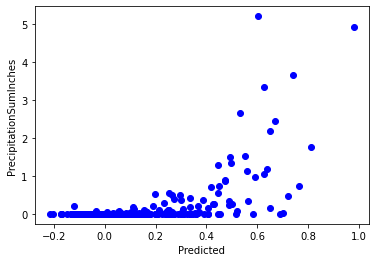

In [7]:
# Scatter plot
plt.scatter( predictions,y_test, color="blue")
plt.ylabel("PrecipitationSumInches")
plt.xlabel("Predicted")
plt.show()

In [9]:
#Sample Input
inp = np.array(
    [
        [74],
        [60],
        [45],
        [67],
        [49],
        [43],
        [33],
        [45],
        [57],
        [29.68],
        [10],
        [7],
        [2],
        [0],
        [20],
        [4],
        [31],
    ]
)

inp = inp.reshape(1, -1)

The precipitation in inches for the input is: [[0.7623258]]
The precipitation trend graph: 


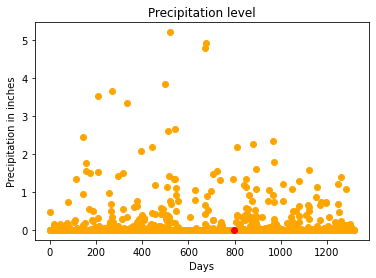

In [10]:
# Printing the output
print("The precipitation in inches for the input is:", clf.predict(inp))

print("The precipitation trend graph: ")
plt.scatter(days, Y, color="orange")
plt.scatter(days[day_index], Y[day_index], color="red")
plt.title("Precipitation level")
plt.xlabel("Days")
plt.ylabel("Precipitation in inches")
plt.show()

Preciptiation Vs Selected Attributes Graph: 


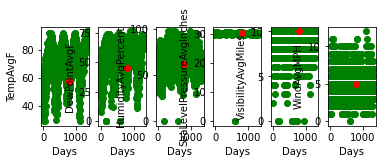

In [23]:
#Filtering the data in variable X
x_f = X.filter(
    [
        "TempAvgF",
        "DewPointAvgF",
        "HumidityAvgPercent",
        "SeaLevelPressureAvgInches",
        "VisibilityAvgMiles",
        "WindAvgMPH",
    ],
    axis=1,
)


print("Preciptiation Vs Selected Attributes Graph: ")
for i in range(x_f.columns.size):
    plt.subplot(2, 6, i + 1)
    plt.scatter(days, x_f[x_f.columns.values[i][:100]], color="g")
    plt.scatter(days[day_index], x_f[x_f.columns.values[i]][day_index], color="r")
    plt.xlabel("Days")
    plt.ylabel(x_f.columns[i])


# plot a graph with a few features vs precipitation to observe the trends
plt.show()

In [25]:
# Evaluating the errors
print("MAE: {}".format(metrics.mean_absolute_error(y_test, predictions)))
print("MSE: {}".format(metrics.mean_squared_error(y_test, predictions)))
print("RMSE: {}".format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))

MAE: 0.17027750448705628
MSE: 0.1943291800010856
RMSE: 0.44082783487557314


In [24]:
#Recreating the data frame with their resepctive coeffients
pd.DataFrame(clf.coef_ , X.columns, columns=['Coeffecient'])

ValueError: Shape of passed values is (1, 17), indices imply (17, 1)